#### <strong>第三次作品：三個分類器於兩組影像的評比實驗</strong>
學號：711333104

姓名：林子齊
<hr>

 <font color=skyblue>作品目標</font>：
 <hr>

In [27]:
from importlib import reload
import HW3_common_utils
reload(HW3_common_utils)

<module 'HW3_common_utils' from 'c:\\Users\\Jimmy\\Desktop\\git\\ML711333104\\HW3_common_utils.py'>

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
from HW3_common_utils import split_and_scale, apply_pca, run_logistic_regression_cv, run_logistic_gridcv, \
    run_svm_classification, run_mlp_classifier, plot_mlp_loss_curve

先觀察資料的型態。


In [56]:
D = scipy.io.loadmat('data/allFaces.mat')
X = D['faces'] # 32256 x 2410 each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item() # 168
n = D['n'].item() # 192
n_persons = D['person'].item() # 38

# print the data information
print('X.shape =', X.shape)
print('y.shape =', y.shape)
print('Total number of images =', X.shape[1])
print('Total number of persons =', n_persons)
print('Image size =', m, 'x', n)
print('Number of images for each person =',y) 
print('Total number of images =', y.sum())

X.shape = (32256, 2410)
y.shape = (38,)
Total number of images = 2410
Total number of persons = 38
Image size = 168 x 192
Number of images for each person = [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
Total number of images = 2410


In [57]:
# 根據 y 產生 0~37 的 label
label_list = []
for person_id, count in enumerate(y):  # y 是每人的圖片數
    label_list.extend([person_id] * count)
y_full = np.array(label_list)  # 長度為 2410

unique, counts = np.unique(y_full, return_counts=True)
print("每個人的圖片數量：")
for label, count in zip(unique, counts):
    print(f"Person {label:2d}: {count} images")


每個人的圖片數量：
Person  0: 64 images
Person  1: 62 images
Person  2: 64 images
Person  3: 64 images
Person  4: 62 images
Person  5: 64 images
Person  6: 64 images
Person  7: 64 images
Person  8: 64 images
Person  9: 64 images
Person 10: 60 images
Person 11: 59 images
Person 12: 60 images
Person 13: 63 images
Person 14: 62 images
Person 15: 63 images
Person 16: 63 images
Person 17: 64 images
Person 18: 64 images
Person 19: 64 images
Person 20: 64 images
Person 21: 64 images
Person 22: 64 images
Person 23: 64 images
Person 24: 64 images
Person 25: 64 images
Person 26: 64 images
Person 27: 64 images
Person 28: 64 images
Person 29: 64 images
Person 30: 64 images
Person 31: 64 images
Person 32: 64 images
Person 33: 64 images
Person 34: 64 images
Person 35: 64 images
Person 36: 64 images
Person 37: 64 images


### 資料切分說明

為了進行交叉驗證時能減少資料偏差，我們將**資料依照原始類別比例**進行切分，將資料集分成：

- **訓練集（Training Set）**：70%
- **測試集（Testing Set）**：30%

透過**分層切分（stratified split）**，確保每一類別在訓練集與測試集中都保有相近的比例，有助於：

- 提高交叉驗證的代表性
- 降低模型偏誤（bias）
- 評估模型在未見資料上的泛化能力

In [ ]:
X = X.T # 2410 x 32256 each row represents an image

X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale(
    X, y_full, test_size=0.3
)

print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Testing samples: {X_test_scaled.shape[0]}")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")
print("類別數量：", len(np.unique(y_full)))

Training samples: 1687
Testing samples: 723
Training data shape: (1687, 32256)
Testing data shape: (723, 32256)
類別數量： 38


## 1. 原始資料

### 1-1 多元羅吉斯回歸 (Multinomial Logistic Regression)

In [ ]:
# 執行 Logistic Regression CV
result = run_logistic_regression_cv(
    X_train_scaled, X_test_scaled, y_train, y_test,
    solver='lbfgs',
    Cs=np.logspace(-5, 5, 20),
    cv=5,
    tol=1e-6,
    max_iter=int(1e6),
    verbose=0,
    print_report=True
)

Logistic Regression with CV (solver = lbfgs)
Best C = [0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293]
Training Accuracy: 99.70%
Testing Accuracy : 96.96%
Elapsed time: 13854.20 seconds


### 1-2 支援向量機

In [28]:
result = run_svm_classification(
    X_train_scaled, X_test_scaled, y_train, y_test,
    kernel='linear',
    use_linear_svc=False 
)

SVM Classification (SVC-linear)
Test Accuracy: 92.67%
Elapsed Time: 178.09 seconds


In [16]:
result = run_svm_classification(
    X_train_scaled, X_test_scaled, y_train, y_test,
    kernel='rbf',
    C=0.1,
    gamma=0.2,
    use_linear_svc=False
)

SVM Classification (SVC-rbf)
Test Accuracy: 22.68%
Elapsed Time: 554.95 seconds


In [10]:
result = run_svm_classification(
    X_train_scaled, X_test_scaled, y_train, y_test,
    kernel='poly',
    degree=2,
    gamma='auto',
    use_linear_svc=False 
)

SVM Classification (SVC-poly)
Test Accuracy: 74.41%
Elapsed Time: 267.61 seconds


In [11]:
result = run_svm_classification(
    X_train_scaled, X_test_scaled, y_train, y_test,
    kernel='poly',
    degree=3,
    gamma='auto',
    use_linear_svc=False 
)

SVM Classification (SVC-poly)
Test Accuracy: 65.84%
Elapsed Time: 273.09 seconds


In [17]:
result = run_svm_classification(
    X_train_scaled, X_test_scaled, y_train, y_test,
    kernel='rbf',
    C=1,
    gamma=0.2,
    use_linear_svc=False
)

SVM Classification (SVC-rbf)
Test Accuracy: 21.58%
Elapsed Time: 452.59 seconds


In [ ]:
result = run_svm_classification(
    X_train_scaled, X_test_scaled, y_train, y_test,
    use_linear_svc=True  
)

### 1-3 神經網路

MLP Classifier Report
Test Accuracy: 91.29%
Elapsed Time: 47.97 seconds


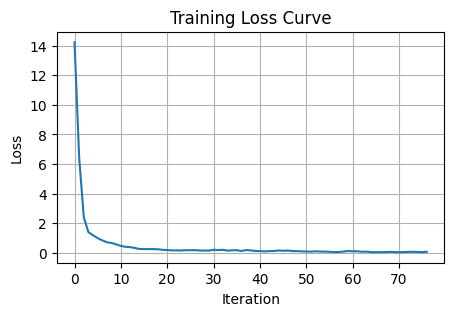

In [ ]:
result = run_mlp_classifier(
    X_train_scaled, X_test_scaled, y_train, y_test,
    hidden_layers=(50),
    activation='relu',
    solver='adam',
    print_report=True,
    random_state=42
)

plot_mlp_loss_curve(result['model'])

MLP Classifier Report
Test Accuracy: 94.74%
Elapsed Time: 156.38 seconds


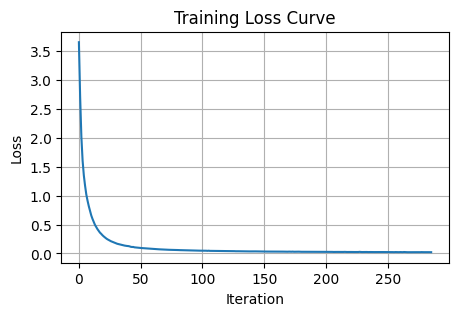

In [40]:
result = run_mlp_classifier(
    X_train_scaled, X_test_scaled, y_train, y_test,
    hidden_layers=(50,),
    activation='relu',
    solver='sgd',
    print_report=True,
    random_state=42
)

plot_mlp_loss_curve(result['model'])

## 2. 主成分資料

In [ ]:
X_train_pca, X_test_pca, pca = apply_pca(X_train_scaled, X_test_scaled, variance_ratio=0.8)

### 2-1 多元羅吉斯回歸 

In [ ]:
result = run_logistic_regression_cv(
    X_train_pca, X_test_pca, y_train, y_test,
    solver='lbfgs',
    Cs=np.logspace(-5, 5, 20),
    cv=5,
    tol=1e-6,
    max_iter=int(1e6),
    verbose=0,
    print_report=True
)

Logistic Regression with CV (solver = lbfgs)
Best C = [0.54555948 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948
 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948
 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948
 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948
 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948
 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948 0.54555948
 0.54555948 0.54555948]
Training Accuracy: 37.40%
Testing Accuracy : 33.47%
Elapsed time: 181.96 seconds


會發現訓練出來的狀況很糟糕，所以考慮把variance_ratio調高至0.95。

In [8]:
X_train_pca, X_test_pca, pca = apply_pca(X_train_scaled, X_test_scaled, variance_ratio=0.95)

In [21]:
result = run_logistic_regression_cv(
    X_train_pca, X_test_pca, y_train, y_test,
    solver='lbfgs',
    Cs=np.logspace(-5, 5, 20),
    cv=5,
    tol=1e-4,
    max_iter=int(1e6),
    verbose=0,
    print_report=True
)

Logistic Regression with CV (solver = lbfgs)
Best C = [0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293 0.0483293
 0.0483293 0.0483293 0.0483293]
Training Accuracy: 99.70%
Testing Accuracy : 95.71%
Elapsed time: 37.99 seconds


In [ ]:
param_grid = {
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'C': [0.1, 1, 10]
}

result = run_logistic_gridcv(X_train_pca, y_train, param_grid=param_grid)

### 2-2 支援向量機

In [44]:
result = run_svm_classification(
    X_train_pca, X_test_pca, y_train, y_test,
    kernel='linear',
    use_linear_svc=False 
)

SVM Classification (SVC-linear)
Test Accuracy: 91.56%
Elapsed Time: 0.21 seconds


In [9]:
result = run_svm_classification(
    X_train_pca, X_test_pca, y_train, y_test,
    kernel='rbf',
    C=0.01,
    gamma=0.1,
    use_linear_svc=False
)

SVM Classification (SVC-rbf)
Test Accuracy: 38.87%
Elapsed Time: 0.26 seconds


In [47]:
result = run_svm_classification(
    X_train_pca, X_test_pca, y_train, y_test,
    kernel='poly',
    degree=2,
    gamma='auto',
    use_linear_svc=False 
)

SVM Classification (SVC-poly)
Test Accuracy: 85.89%
Elapsed Time: 0.24 seconds


In [29]:
result = run_svm_classification(
    X_train_pca, X_test_pca, y_train, y_test,
    kernel='poly',
    degree=3,
    gamma='auto',
    use_linear_svc=False 
)

SVM Classification (SVC-poly)
Test Accuracy: 82.57%
Elapsed Time: 0.20 seconds


In [30]:
X_train_pca, X_test_pca, pca = apply_pca(X_train_scaled, X_test_scaled, variance_ratio=0.95)
result = run_svm_classification(
    X_train_pca, X_test_pca, y_train, y_test,
    use_linear_svc=True  
)

SVM Classification (LinearSVC)
Test Accuracy: 93.22%
Elapsed Time: 4.91 seconds


### 2-3 神經網路

MLP Classifier Report
Test Accuracy: 91.84%
Elapsed Time: 1.19 seconds


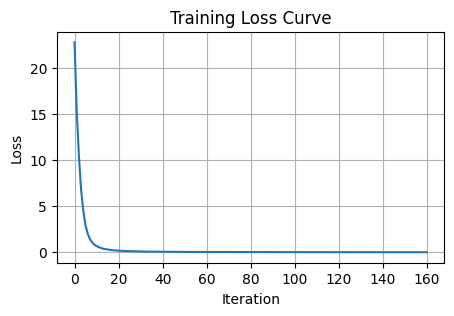

In [54]:
result = run_mlp_classifier(
    X_train_pca, X_test_pca, y_train, y_test,
    hidden_layers=(140,),
    activation='relu',
    solver='adam',
    print_report=True,
    random_state=42
)

plot_mlp_loss_curve(result['model'])

MLP Classifier Report
Test Accuracy: 91.56%
Elapsed Time: 3.23 seconds


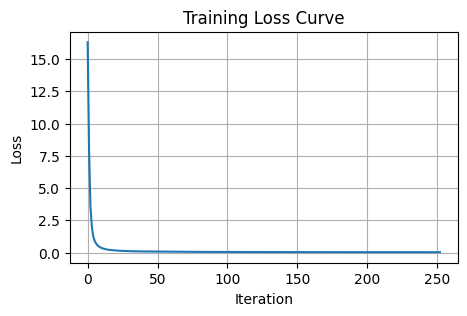

In [46]:
result = run_mlp_classifier(
    X_train_pca, X_test_pca, y_train, y_test,
    hidden_layers=(300,),
    activation='relu',
    solver='sgd',
    print_report=True,
    random_state=42
)

plot_mlp_loss_curve(result['model'])